In [1]:
include("jl/init_default.jl");

21-פבר 11:04:52:INFO:root:N=74293025 min(m)=46.538624 max(m)=959026.75
21-פבר 11:04:52:INFO:root:rescaling masses
21-פבר 11:04:53:INFO:root:N=74293025 min(m)=50.036606 max(m)=1.0311101e6


In [11]:
include("jl/all.jl")
pop_realization()

In [3]:
to_g_fft!(rho);

In [4]:
rho.s[:,:] *= G;

In [5]:
a = zeros(Float32, (3, PARTICLE_NUM_SMALL_REALIZATION))
for dim in 1:3
    from_cic_dim2!(c,pos,rho,dim);
    a[dim,:] = real(c);
end

In [6]:
ax = a[1,:]; #sqrt(a[1,:].^2+a[2,:].^2+a[3,:].^2);

In [21]:
@time get_min_dt(ax,0.01,SMTH,16)

  0.089979 seconds (5 allocations: 176 bytes)


0.00038976070658335596

(3,74293025)

In [3]:
opos_i = SharedArray(Float32, size(pos));

In [4]:
opos_i.s[:,:] = pos.s[:,:];

In [5]:
optimize_2lpt_vs_pushed_pos!(rho, opos_i, pos, m, 0.001, 1.0, 0.21, 200);

20-פבר 22:39:57:INFO:root:opt2lpt start a_from=0.001 a_to=1.0 end_meandx=200 fracmov=0.21
20-פבר 22:39:58:INFO:root:sim2lpt start from a=0.001 to a=1.0
20-פבר 22:40:20:INFO:root:sim2lpt 1st order dim 1
20-פבר 22:40:27:INFO:root:sim2lpt 1st order dim 2
20-פבר 22:40:35:INFO:root:sim2lpt 1st order dim 3
20-פבר 22:41:04:INFO:root:sim2lpt 2nd order dim 1
20-פבר 22:41:11:INFO:root:sim2lpt 2nd order dim 2
20-פבר 22:41:19:INFO:root:sim2lpt 2nd order dim 3
20-פבר 22:41:27:INFO:root:sim2lpt end
20-פבר 22:41:27:INFO:root:opt2lpt step=1 mdx=6448.6074
20-פבר 22:41:32:INFO:root:sim2lpt start from a=0.001 to a=1.0
20-פבר 22:41:54:INFO:root:sim2lpt 1st order dim 1
20-פבר 22:42:02:INFO:root:sim2lpt 1st order dim 2
20-פבר 22:42:10:INFO:root:sim2lpt 1st order dim 3
20-פבר 22:42:40:INFO:root:sim2lpt 2nd order dim 1
20-פבר 22:42:47:INFO:root:sim2lpt 2nd order dim 2
20-פבר 22:42:55:INFO:root:sim2lpt 2nd order dim 3
20-פבר 22:43:02:INFO:root:sim2lpt end
20-פבר 22:43:03:INFO:root:opt2lpt step=2 mdx=3451.5088


In [6]:
mean_std_dx_vs_pushed_pos(opos_i)

(2973.1409f0,2346.3335f0)

In [7]:
kd = get_kd(pos);

In [8]:
to_rho!(opos_i,m, rho);
rho_to_1st_order_vel_pot!(rho);
get_1st_order_comoving_vel!(c, 1.0, 1, rho);
_vx1 = real(c)
first_order_vel_pot_to_sencond_order!(rho);
get_2nd_order_comoving_vel!(c, 1.0, 1, rho);
_vx2 = real(c);

In [18]:
get_slope_std_smoothed(kd, _vx1-0.5*_vx2, vx, pos, 10000.0, 100000)

(1.4606588979577833,84.791923216313)

In [53]:
pos.s[:,:] = opos_i.s[:,:]
simulate_2lpt!(rho, pos, m, 0.01, 0.3);

17-פבר 10:52:08:INFO:root:sim2lpt start from a=0.01 to a=0.3
17-פבר 10:52:31:INFO:root:sim2lpt 1st order dim 1
17-פבר 10:52:39:INFO:root:sim2lpt 1st order dim 2
17-פבר 10:52:48:INFO:root:sim2lpt 1st order dim 3
17-פבר 10:53:19:INFO:root:sim2lpt 2nd order dim 1
17-פבר 10:53:26:INFO:root:sim2lpt 2nd order dim 2
17-פבר 10:53:36:INFO:root:sim2lpt 2nd order dim 3
17-פבר 10:53:44:INFO:root:sim2lpt end


In [54]:
to_rho!(opos_i,m, rho);

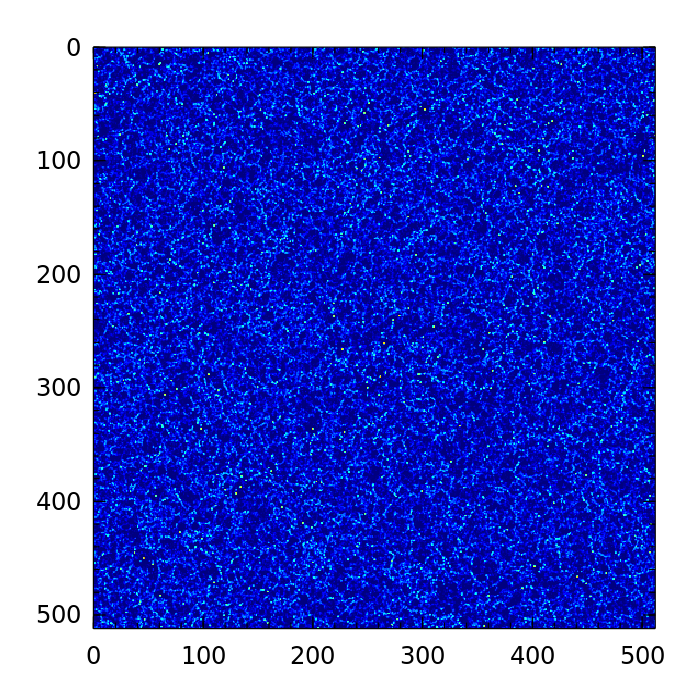

In [55]:
imrho = real(rho[:,:,254]) + real(rho[:,:,255]) + real(rho[:,:,256])
Winston.set_default_plot_size(700,700)
imagesc(log10(1e-8+imrho))

In [56]:
to_delta!(rho);

In [57]:
corr = get_correlation(rho);

In [58]:
pop_realization()
to_delta!(rho)
corr_org = get_correlation(rho);

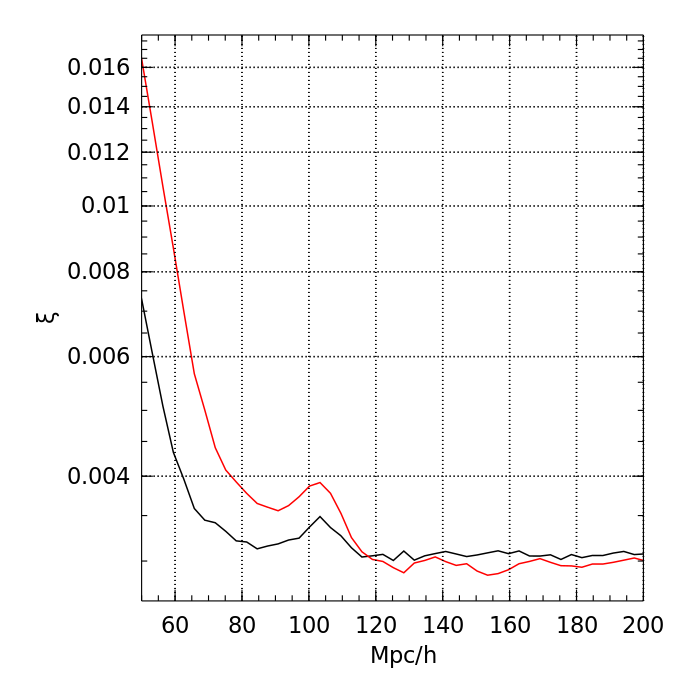

In [59]:
semilogy(xl/1000, corr*1.5)
hold(true)
semilogy(xl/1000, corr_org, "red")
hold(false)
xlim(50,200)
grid(true)
xlabel("Mpc/h")
ylabel("\\xi")